### Importing packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### Load IRIS dataset

In [2]:
iris = datasets.load_iris()

In [3]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [5]:
X = iris['data']
y = iris['target']
feature_names = iris['feature_names']
target_names = iris['target_names']

#note: you can also get access to the elements by dot (.) access operator, e.g.,
# X = iris.data

print(type(X))
print(type(y))
print(X.shape)
print(y.shape)
print(feature_names)
print(target_names)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(150, 4)
(150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


Figure below illustrates the features and target labels for iris dataset. 

<img src="./assets/iris.png" width="500" hight="300" />

### Exploratory Data Analysis

#### Box plot of all features

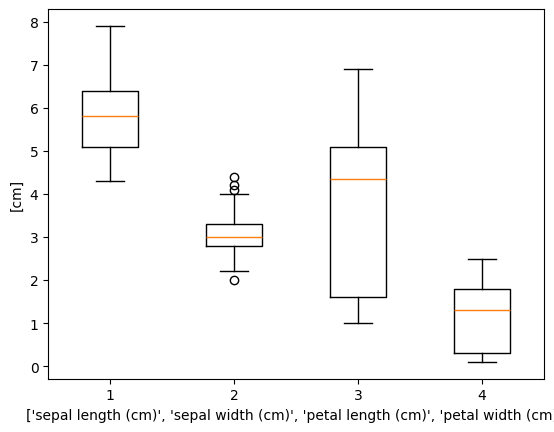

In [6]:
plt.figure()
plt.boxplot(X)
plt.ylabel("[cm]")
plt.xlabel(feature_names)
plt.show()

#### Scatter plot for each pair of features

Plot the scater plot for the pair of first and second features 
```python
(X[:,0], X[:,1]) 
```
Dont't forget to `label` your axes.

hint: use `c=y` inside the scatter plot to color the points based on the target labels.
 

In [7]:
#your code here

Write a function called plot_pairwise that takes the pair of feaure and their labels and plot the scatter plot.

In [7]:
def plot_pair(X1, X2, x1_label , x2_label, y):
    ...

Use plot_pari functions and plot the scatter plot for all pairs of features.
```python
X[:,0], X[:,1], 'Sepal Length', 'Sepal Width'
X[:,0], X[:,2], 'Sepal Length', 'Petal Length'
X[:,0], X[:,3], 'Sepal Length', 'Petal Width'
X[:,1], X[:,2], 'Sepal Width', 'Petal Length'
X[:,1], X[:,3], 'Sepal Width', 'Petal Width'
X[:,2], X[:,3], 'Petal Length', 'Petal Width'
```

In [9]:
#your code here

(Optional) The plots shown above do not have legend. To add legend to the plot, you can use the following code snippet.

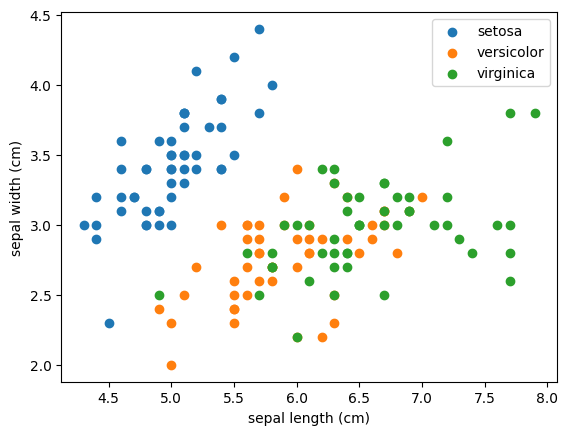

In [11]:
def plot_pair_with_legned(x1, x2, x1_label , x2_label, y):
    plt.figure()
    for i, target_name in enumerate(iris.target_names):
        plt.scatter(x1[y == i], x2[y == i], label=target_name)
    
    plt.xlabel(x1_label) 
    plt.ylabel(x2_label) 
    plt.legend()
    plt.show()

plot_pair_with_legned(X[:,0], X[:,1], feature_names[0], feature_names[1], y)

#### Histogram of each feature

Plot the histogram of each feature. 

In [12]:
#your code here

### K Nearest Neighbors (KNN) 

#### Euclidean Distance (2D)

In geometry, the **Euclidean distance** is the straight-line distance between two points. 

Given two points $ P(x_1, y_1) $ and $ Q(x_2, y_2)$ in a 2D plane, the Euclidean distance between them is calculated  as follows:

$
d(P, Q) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$

<img src="./assets/figure.png" width="400" hight="300" />

#### Example (2D)

Let's say we have two points:
- $ P(2, 2) $
- $ P_2(5, 5) $

We can calculate the distance between these two points.

In [14]:
P = np.array([2, 2])
Q = np.array([5, 5])
distance = np.sqrt(np.sum((P - Q)**2))
distance

np.float64(4.242640687119285)

#### Euclidean Distance (Multi Dimension)

This formula above can be extended to higher dimensions.

In an $n$-dimensional space, given two points $ P_1(x_1, x_2, \dots, x_n)$ and $ P_2(y_1, y_2, \dots, y_n) $, the Euclidean distance between them is:

$
d(P_1, P_2) = \sqrt{(y_1 - x_1)^2 + (y_2 - x_2)^2 + \dots + (y_n - x_n)^2}
$


#### Example (3 Dimensions)

Consider two points in 3D space:
- $ P_1(1, 2, 3) $
- $ P_2(4, 0, 8) $

We can calculate the Euclidean distance as follows:

$
d(P_1, P_2) = \sqrt{(4 - 1)^2 + (0 - 2)^2 + (8 - 3)^2}
$

$
d(P_1, P_2) = \sqrt{3^2 + (-2)^2 + 5^2} = \sqrt{9 + 4 + 25} = \sqrt{38} \approx 6.16
$

In [15]:
# Define two points in 3D space
P1 = np.array([1, 2, 3])
P2 = np.array([4, 0, 8])

# Calculate the Euclidean distance
distance = np.sqrt(np.sum((P2 - P1)**2))

print(f'The Euclidean distance between P1 and P2 is: {distance:.2f}')

The Euclidean distance between P1 and P2 is: 6.16


Wrie a function that get two np arrays `P` and `Q` and return the Euclidean distance between them.


In [16]:
def straight_line_distance(P, Q):
    ...

#### KNN Algorithm

<img src="./assets/knn2.jpg" width="800" hight="200" /> 

### KNN from scratch

Now we are going to implement the four steps of the KNN algorithm explained above from scratch.

0. `Look at the data`set and split it into training and testing sets
1. `Calculate distance` between the new point from testset and all points in the trainset
2. Sort the distances and `find` the `k` nearest `neighbors` based on the smallest distances
3. Determine the `majority` of the class of the `k` nearest neighbors

#### 0 - Look at the data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

#### 1 - Calculate distances

Take one sample from test set and find the distance between this sample and all samples in the training set. In addition to the distance, you need to store the index of the sample in the training set. 

So for exaple if the distance between the test sample and the 5th sample in the training set is 3.5, you need to store (5, 3.5).

In [19]:
test_instance = X_test[0]

distances = [] # you should be the (index, distance) tuple inside this list
# your code here

Write a function called `calculate_distances` that takes the test sample and the training set and return the distances and the indices of the training samples.

In [21]:
def calculate_distances(test_instance, X_train):
    #return distances 
    ...

#### 2 - Find neighbors

**Step 1:** Sort the (index, distance) tuples based on distance value in anascending order.

In [23]:
distances = calculate_distances(test_instance, X_train)
distances.sort(key=lambda x: x[1])
distances

[(34, np.float64(0.22360679774997896)),
 (45, np.float64(0.30000000000000027)),
 (28, np.float64(0.5099019513592785)),
 (35, np.float64(0.5099019513592788)),
 (66, np.float64(0.5196152422706639)),
 (47, np.float64(0.5291502622129183)),
 (17, np.float64(0.5830951894845297)),
 (36, np.float64(0.6164414002968978)),
 (65, np.float64(0.6244997998398398)),
 (41, np.float64(0.6480740698407859)),
 (48, np.float64(0.6999999999999995)),
 (70, np.float64(0.7071067811865478)),
 (63, np.float64(0.728010988928052)),
 (23, np.float64(0.741619848709566)),
 (14, np.float64(0.754983443527075)),
 (68, np.float64(0.774596669241483)),
 (73, np.float64(0.7874007874011811)),
 (0, np.float64(0.8124038404635955)),
 (50, np.float64(0.8124038404635965)),
 (9, np.float64(0.8602325267042631)),
 (60, np.float64(0.9273618495495711)),
 (18, np.float64(0.9433981132056598)),
 (67, np.float64(0.9643650760992956)),
 (20, np.float64(0.9746794344808962)),
 (5, np.float64(0.9746794344808963)),
 (37, np.float64(1.00498756211

**Step 2:** Select the first k elements of the sorted list. And, store the index of these k elements in a list.

In [24]:
k = 5
distances[:k]

[(34, np.float64(0.22360679774997896)),
 (45, np.float64(0.30000000000000027)),
 (28, np.float64(0.5099019513592785)),
 (35, np.float64(0.5099019513592788)),
 (66, np.float64(0.5196152422706639))]

In [25]:
neighbor_index =[]
# your code here 

**Step 3:** Find the labels of these top k samples from y_train array.

In [27]:
neighbor_label = []
#your code here

Now write a function `find_neighbors` to do all the steps above from 1 to 3. 

In [29]:
def find_neighbors(test_instance, X_train, y_train, k):
    """
        Inputs
        test_instance: One data point form test set
        X_train: train dataset
        y_train: train labels
        k: number of neighbours

        Output
        neighbor_label: list of k neighbours labels
    """
    #your code here


#### 3 - Vote on labels

You have this function to vote on labels of the k nearest neighbors.

In [31]:
def vote_on_labels(neighbor_label):
    prediction_dict = {}
    for x in neighbor_label:
        if x in prediction_dict:
            prediction_dict[x] += 1
        else:
            prediction_dict[x] = 1
    prediction = max(prediction_dict, key=prediction_dict.get)
    return prediction

In [32]:
y_pred = vote_on_labels(neighbor_label)
y_pred

np.int64(1)

### 4 - put it all together

Now implement the KNN algorithm to all samples in the test set.

In [ ]:
y_pred = []
#your code here

Turn your code into a function `KNN` that takes the `training set`, the `target labels` of the training set, the `test set`, and the value of k and return the predicted labels of the test set.

In [34]:
def KNN(X_train, y_train, X_test, k):
    ...

### 5 - Evaluate the model

Finally, calculate the accuracy of the KNN algorithm.

In [36]:
y_test == y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True])

In [37]:
accuracy = sum(y_test == y_pred) / len(y_test)
print(f"accuracy: {accuracy * 100} %")

accuracy: 94.66666666666667 %


Turn your code into a function `evaluate` that takes the predicted labels and the true labels and return the accuracy of the model.

In [38]:
def evaluate(y_test, y_pred):
    # your code here
    ...

### KNN in Scikit-Learn

In [40]:
knn_model = KNeighborsClassifier(n_neighbors=4) # You can change the value of 'k' as needed.
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 93.33%


#### (Optional) 6 - Hyperparameter tuning

So far we have used k=3. Now, we are going to find the best value of k for the KNN algorithm.

In [42]:
K = [1, 2, 3, 4, 5, 6, 7, 8]
my_accs = []
# your code here

plot the accuracy of the model for different values of k with scikit-learn and compare the results with the results from the scratch implementation.


In [44]:
K = [1, 2, 3, 4, 5, 6, 7, 8]
sklearn_accs = []
#your code here

Can you justify the difference between the results of the two implementations?